# Homework 4

- Execute the below code, then answer the numbered questions.

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/car-reg-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           8164 non-null   object 
 1   transmission   8106 non-null   object 
 2   state          8152 non-null   object 
 3   condition      8173 non-null   float64
 4   odometer       8178 non-null   float64
 5   auction_value  8107 non-null   float64
 6   selling_price  9055 non-null   float64
dtypes: float64(4), object(3)
memory usage: 495.3+ KB


In [2]:
from sklearn.model_selection import train_test_split
features = [x for x in df.columns if x != 'selling_price']

X = df[features]
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 7,244
Records in test data: 1,811

Features:
make
transmission
state
condition
odometer
auction_value


## Question 1: Split the features into two lists, one for the numerical features and another for the categorical features.

In [10]:
# spliting features into numerical and categorical
num_features = list(X_train.select_dtypes(include='number').columns)
cat_features = list(X_train.select_dtypes(include=['object', 'category']).columns)
print(num_features)
print(cat_features)

['condition', 'odometer', 'auction_value']
['make', 'transmission', 'state']


## Question 2: Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#creating pipeline for numerical features 
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

## Question 3: Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.
- You should be dropping one category from each variable when using the one-hot encoder.  
- To ensure the pipeline doesn't break when it receives new/unexpected categories, you should ignore new categories.
- Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.

In [14]:
from sklearn.preprocessing import OneHotEncoder

#creating pipeline for categorical features 
categorical_pipeline = Pipeline([
    ('simpleimputer', SimpleImputer(strategy='most_frequent')),
    ('onehotencoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore'))
])

## Question 4: Combine the numerical and categorical pipelines into one data processing pipeline.
- Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.

In [15]:
from sklearn.compose import ColumnTransformer

#combining categorical and numerical pipelines
preprocessing_pipeline = ColumnTransformer([
    ('num', numerical_pipeline, num_features),
    ('cat', categorical_pipeline, cat_features)
])


X_train_processed = preprocessing_pipeline.fit_transform(X_train)

## Question 5: Add a linear regression model to the pipeline.
- Report what the $R^2$ is using the `test` data.  

In [16]:
from sklearn.linear_model import LinearRegression

regression_model = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('regressor', LinearRegression())
])

regression_model.fit(X_train, y_train)

R2_score = regression_model.score(X_test, y_test)
print(f'R^2 score: {R2_score:.4f}')

R^2 score: 0.8838


## Question 6: Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?
- Include a sentence or two on what you observe.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='selling_price'>

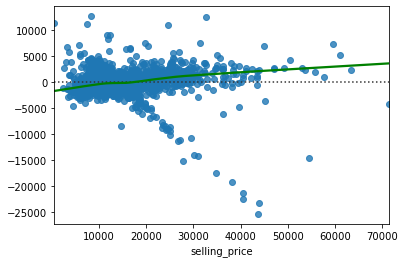

In [17]:
import seaborn as sns

y_pred = regression_model.predict(X_test)

sns.residplot(y_test, y_pred, lowess=True, line_kws={'color': 'green'})

The residuals appear to be somewhat randomly distributed around the horizontal axis, but there are also some outlier in the data. Apart from that there is a slight curvature in the line, which is not matching with line at zero. which could indicate that a linear model is not the best fit for the data.

## Question 7: Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the $R^2$?

In [18]:
from sklearn.linear_model import Ridge

Ridge_regression_model = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('regressor', Ridge(alpha=100))
])

Ridge_regression_model.fit(X_train, y_train)

r2_score_ridge = Ridge_regression_model.score(X_test, y_test)
print(f'R^2 score of Ridge regression model: {r2_score_ridge:.4f}')

R^2 score of Ridge regression model: 0.8840
